we're going to try and fit a non-linear model to the datapoints corrensponding to China's GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year. 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#downloading dataset
#!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Plotting the Dataset ###

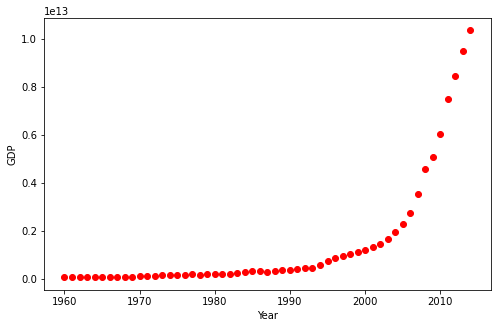

In [8]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Choosing a model ###

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:

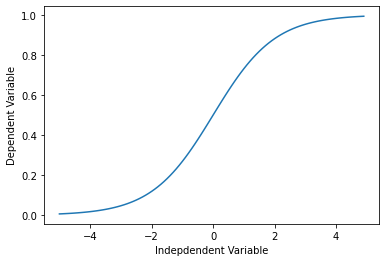

In [9]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Building The Model ###

In [10]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

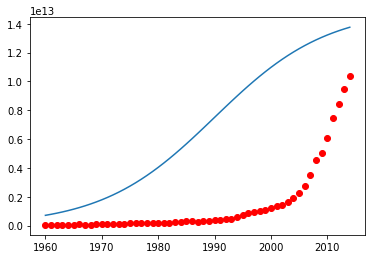

In [11]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Our task here is to find the best parameters for our model. Lets first normalize our x and y:

In [12]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### How we find the best parameters for our fit line?
we can use __curve_fit__ which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

popt are our optimized parameters.

In [13]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


Now we plot our resulting regresssion model.

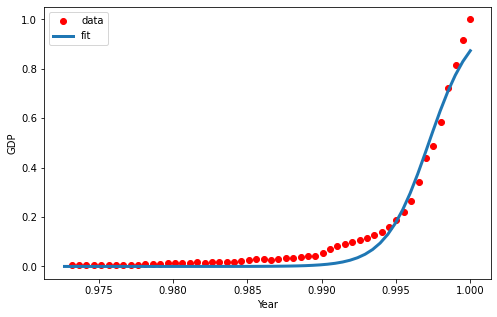

In [14]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()